### <span style = 'color:green'> Capstone Project </span>
#### <span style = 'color:blue'> Problem statement : Perform sentiment analysis on Omnicron variant, data fetching directly from twitter</span>
**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-IDF Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

- Here we have to get dataset directly fetched from twitter in realtime 

- performing realtime sentimental analysis on realtime data collecting from twitter
- objective: perform sentiment analysis on realtime data collected from twitter 

                      

           

### <span style = 'color:blue'>   API (Application Programm Interface)</span>
- Imagine you’re sitting at a table in a restaurant with a menu of choices to order from. The kitchen is the part of the “system” that will prepare your order. What is missing is the critical link to communicate your order to the kitchen and deliver your food back to your table. That’s where the waiter or API comes in. The waiter is the messenger – or API – that takes your request or order and tells the kitchen – the system – what to do. Then the waiter delivers the response back to you; in this case, it is the food.
- API's are huge and are used everywhere
- In simple words api stands as bridge for one to access the content in one's storage 
- There are many APIs on the Twitter platform that software developers can engage with, with the ultimate possibility to create fully automated systems which will interact with Twitter. While this feature could benefit companies by drawing insights from Twitter data

   **From twitter api it's possible to extract many insights some are**
- Tweets: searching, posting, filtering, engagement, streaming etc.
- Accounts and users (Beta): account management, user interactions.
- Media: uploading and accessing photos, videos and animated GIFs.
- Trends: trending topics in a given location.
- Geo: information about known places or places near a location.

**Getting twitter API keys**
- If you don't already have an account, you can login with your normal Twitter credentials 


- follow the required prompts to create a developer project or click here <a href="https://dev.twitter.com/apps" title="Twitter">Click here</a>
- Requesting the API key and secret via the Developer Portal causes Twitter to produce the following three things:
1. API key (this is your 'consumer key')
2. API secret key (this is your 'consumer secret')
3. Bearer token
- Next, visit the 'Authentication Tokens' area of the Developer Portal and generate an 'Access token & secret'. This will provide you with the following two items:
1. Access token (this is your 'token key')
2. Access token secret (this is your 'token secret')


**Expected output**
- the data fetched from twitter should undergo EDA for analyzing, cleaning, handling, manupulation, visualization..,etc
- final output should show the sentiment of the data


  *Some tips to consider*

- Machines can learn in every possible way so its always better to think out of the box
    
- Perform eda as diverse as possible and in contineous manner
    
- Try configuring with diffrent models to know how each model is diffrent with other ones 
    
- Donot try to involve unneccesory codes and useless algorithms for dataset which just increases complexity
    
- Approaching problem statement in n number of ways helps us to find best one possible
    
- It's easier for one to understnd and manupulate if we have models as simple as possible 
    
- When we have multiple models we can have multiple judgements based on models and their efficiencies
    
- Tuning helps increasing accuracy :)
    
- Have an idea of time consumed by the model, its better to have a model whose time management is good
    
- Spend good amount of time on analyzing dataset and draw as much insights as possible

- Tweepy is importantlibrary we will using to fetch data from twitter by api


For more on tweepy documentation please click here <a href="https://docs.tweepy.org/en/stable/getting_started.html#hello-tweepy" title="Tweepy">Click here</a>

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import lightgbm as lgb

import scipy.stats as stats

In [7]:
df = pd.read_csv("C:\\Users\\Sehjal\\Downloads\\Twitter_Omicron_data_1_1_1_1_1.csv")

In [8]:
df


,tweets,likes,time,retweet_count
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1
...,...,...,...,...
6993,@Cycl_Conscience @BallouxFrancois Your argumen...,1,2023-02-27 18:56:31,0
6994,"@BretWeinstein I don't think it escaped, they ...",0,2023-02-27 18:54:55,0
6995,@_50kgold Do you have to show your face? I'd b...,0,2023-02-27 18:53:55,0
6996,@noxcato @andrewtanyongyi @TAH_Sci @hsom113 @M...,1,2023-02-27 18:49:59,0


DATA CLEANING

In [9]:
df['retweet_count'].value_counts()

retweet_count
0       5956
1        495
2        124
3         98
4         46
        ... 
35         1
25         1
1622       1
76         1
284        1
Name: count, Length: 74, dtype: int64

In [10]:
df['length'] = df['tweets'].str.len()

In [11]:
import nltk
from textblob import TextBlob
import re
def clean_tweet(tweet):
    
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


def analyze_sentiment(tweet):
    
    '''
    Utility function to analyze the sentiment of text 
    using the polarity, thereby classifying in 3 categories. 
    '''
    
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [12]:
df['Sentiment_analysis'] = np.array([ analyze_sentiment(tweet) for tweet in df['tweets'] ])

display(df.head(10))


,tweets,likes,time,retweet_count,length,Sentiment_analysis
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,116,Positive
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,36,Negative
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,108,Positive
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,242,Positive
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,262,Negative
5,FGS @UKHSA pauses ONS C-19 Infection Survey 4 ...,0,2023-03-09 18:12:53,0,275,Positive
6,"@SandraHelena39 Look on the bright side, Omicr...",0,2023-03-09 18:12:48,0,173,Positive
7,@OMICRON_XBB Dream bigger,0,2023-03-09 18:11:32,0,25,Neutral
8,@NOTSubzerodrew As my last wish,0,2023-03-09 18:10:28,0,31,Neutral
9,"@thereal_truther @SadieXShaw Again, graphs are...",0,2023-03-09 18:10:23,0,308,Negative


<Axes: xlabel='Sentiment_analysis'>

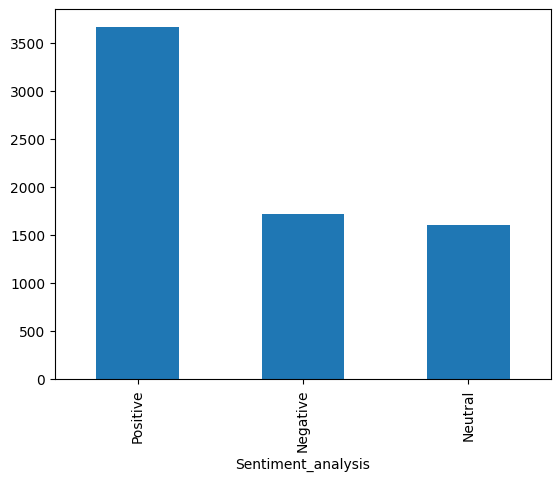

In [13]:
df['Sentiment_analysis'].value_counts().plot(kind='bar')

In [14]:
df['clean_tweets'] = df['tweets'].apply(clean_tweet)

REMOVING UNWANTING COLUMNS

In [15]:
df['token_tweets'] = df["clean_tweets"].apply(lambda x:x.split())
df

,tweets,likes,time,retweet_count,length,Sentiment_analysis,clean_tweets,token_tweets
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,116,Positive,6 big questions about new Omicron targeting bo...,"[6, big, questions, about, new, Omicron, targe..."
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,36,Negative,I m confused,"[I, m, confused]"
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,108,Positive,Long COVID less likely after Omicron than afte...,"[Long, COVID, less, likely, after, Omicron, th..."
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,242,Positive,The finding don t tally with the high numbers ...,"[The, finding, don, t, tally, with, the, high,..."
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,262,Negative,A conference abstract from the European Congre...,"[A, conference, abstract, from, the, European,..."
...,...,...,...,...,...,...,...,...
6993,@Cycl_Conscience @BallouxFrancois Your argumen...,1,2023-02-27 18:56:31,0,250,Negative,Conscience Your argument is flawed Masks work ...,"[Conscience, Your, argument, is, flawed, Masks..."
6994,"@BretWeinstein I don't think it escaped, they ...",0,2023-02-27 18:54:55,0,202,Neutral,I don t think it escaped they opened the cell ...,"[I, don, t, think, it, escaped, they, opened, ..."
6995,@_50kgold Do you have to show your face? I'd b...,0,2023-02-27 18:53:55,0,107,Neutral,50kgold Do you have to show your face I d be r...,"[50kgold, Do, you, have, to, show, your, face,..."
6996,@noxcato @andrewtanyongyi @TAH_Sci @hsom113 @M...,1,2023-02-27 18:49:59,0,193,Negative,Sci That it all worked before Delta Omicron is...,"[Sci, That, it, all, worked, before, Delta, Om..."


STEMMING

In [16]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def simpleStemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

df['stem_tweets'] = df['clean_tweets'].apply(simpleStemmer)
df.head()

,tweets,likes,time,retweet_count,length,Sentiment_analysis,clean_tweets,token_tweets,stem_tweets
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,116,Positive,6 big questions about new Omicron targeting bo...,"[6, big, questions, about, new, Omicron, targe...",6 big question about new omicron target booste...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,36,Negative,I m confused,"[I, m, confused]",i m confus
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,108,Positive,Long COVID less likely after Omicron than afte...,"[Long, COVID, less, likely, after, Omicron, th...",long covid less like after omicron than after ...
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,242,Positive,The finding don t tally with the high numbers ...,"[The, finding, don, t, tally, with, the, high,...",the find don t talli with the high number we s...
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,262,Negative,A conference abstract from the European Congre...,"[A, conference, abstract, from, the, European,...",a confer abstract from the european congress o...


In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sehjal\AppData\Roaming\nltk_data...


True

LEMMATIZATION

In [19]:
def simpleLemmatization(text):
    lemma = nltk.stem.WordNetLemmatizer()
    text = ' '.join([lemma.lemmatize(word) for word in text.split()])
    return text

df['lemmatize_tweets'] = df['clean_tweets'].apply(simpleLemmatization)
df.head()

,tweets,likes,time,retweet_count,length,Sentiment_analysis,clean_tweets,token_tweets,stem_tweets,lemmatize_tweets
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,116,Positive,6 big questions about new Omicron targeting bo...,"[6, big, questions, about, new, Omicron, targe...",6 big question about new omicron target booste...,6 big question about new Omicron targeting boo...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,36,Negative,I m confused,"[I, m, confused]",i m confus,I m confused
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,108,Positive,Long COVID less likely after Omicron than afte...,"[Long, COVID, less, likely, after, Omicron, th...",long covid less like after omicron than after ...,Long COVID le likely after Omicron than after ...
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,242,Positive,The finding don t tally with the high numbers ...,"[The, finding, don, t, tally, with, the, high,...",the find don t talli with the high number we s...,The finding don t tally with the high number w...
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,262,Negative,A conference abstract from the European Congre...,"[A, conference, abstract, from, the, European,...",a confer abstract from the european congress o...,A conference abstract from the European Congre...


FREQ WORDS

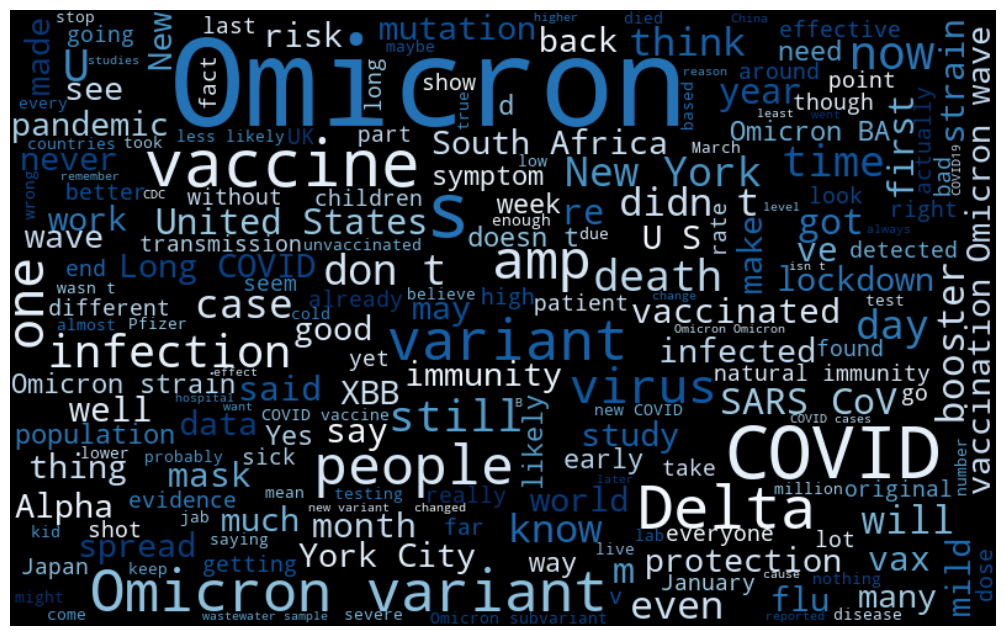

In [24]:
all_words = " ".join([sentence for sentence in df["clean_tweets"]])

from wordcloud import WordCloud
wordcloud = WordCloud(colormap='Blues',width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


FREQ +VE WORDS

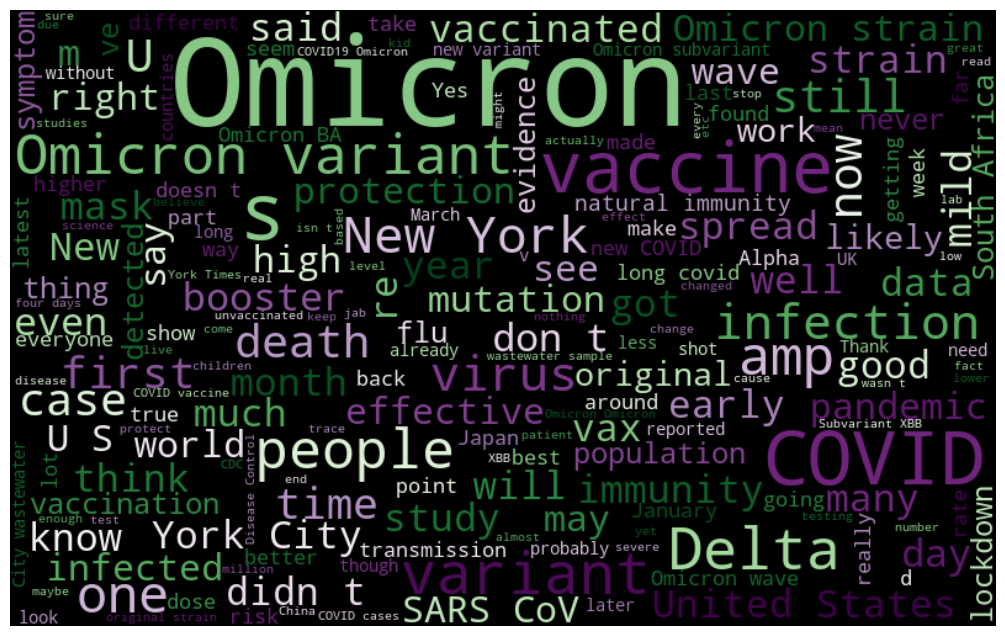

In [32]:
all_words = " ".join([sentence for sentence in df["clean_tweets"][df["Sentiment_analysis"] == 'Positive']])

wordcloud = WordCloud(colormap='PRGn',width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

FREQ -VE WORDS

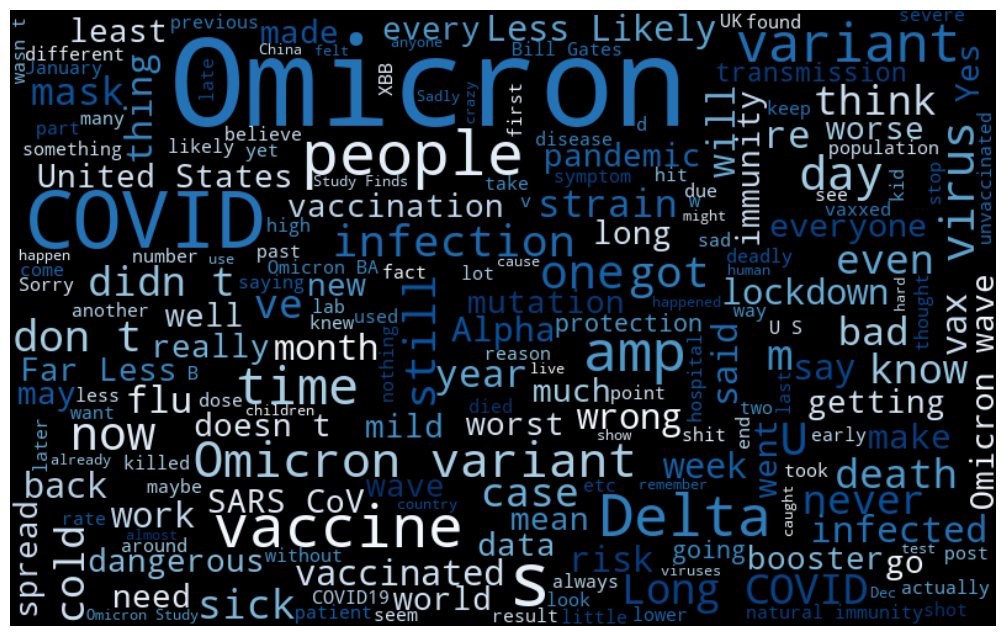

In [34]:
all_words = " ".join([sentence for sentence in df["clean_tweets"][df["Sentiment_analysis"] == 'Negative']])

wordcloud = WordCloud(colormap='Blues',width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

HASHTAG EXTRACTION


In [35]:
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [36]:
ht_positive = hashtag_extract(df["tweets"][df["Sentiment_analysis"] == 'Positive'])

ht_neutral = hashtag_extract(df["tweets"][df["Sentiment_analysis"]=='Neutral'])

ht_negative = hashtag_extract(df["tweets"][df["Sentiment_analysis"]== 'Negative'])

In [37]:
ht_positive = sum(ht_positive, [])
ht_neutral  = sum(ht_neutral,[])
ht_negative = sum(ht_negative, [])

In [38]:
ht_positive

['Boosting',
 'Target',
 'targeting',
 'boost',
 'Omicron',
 'rttu',
 'rapid',
 'test',
 'trace',
 'USA',
 'COVID',
 'pandemic',
 'Corona',
 'insurance',
 'coverage',
 'antigen',
 'rat',
 'Omicron',
 'maryland',
 'news',
 'COVID19',
 'COVID19COLORADO',
 '9news',
 'vaccine',
 'omicron',
 'Gematria',
 'WeCanDoThis',
 'UnitedAgainstCOVID',
 'SexyLiberal',
 'SexyLibArmy',
 'DrDoom',
 'Refugees',
 'UkraineUnderAttaсk',
 'COVID19',
 'Omicron',
 'ChiGammagamma',
 'XGG',
 'theeliteoftheelite',
 'omegapsiphi',
 'fietts',
 '1',
 'COVID19',
 'LongCovid',
 's',
 'omicron',
 's',
 'COVID',
 'LongCovid',
 's',
 'omicron',
 's',
 'COVID',
 'COVID19',
 'Omicron',
 'COVID',
 'CovidIsntOver',
 'CovidIsntOver',
 'CovidIsntOver',
 'CovidIsntOver',
 'CovidIsntOver',
 'LongCOVID',
 'Buckleup',
 'CovidIsntOver',
 'SARScoV2',
 'LongCovid',
 'COVID19',
 'Omicron',
 'ECCMID2023',
 'LongCOVID',
 'NewsAndInformation',
 'CovidIsntOver',
 'COVID19',
 'Covid',
 'Novavax',
 'NovavaxWorks',
 'BisexualLighting',
 'COVI

In [40]:
ht_negative

['Omicron',
 'LongCovid',
 'SARSCoV2',
 'PhysicianBurnout',
 'COVID19',
 'WastewaterTesting',
 'Omicron',
 'COVID19',
 'LongCovid',
 'LongCovidKids',
 'PASC',
 'POTS',
 'SARSCoV2',
 'XBB15',
 'Delta',
 'Omicron',
 'TN',
 'COVID',
 'Coimbatore',
 'Chennai',
 'Chengalpet',
 'COVID19',
 'Omicron',
 'MaskUP',
 'Science',
 'COVID19',
 'CovidBrain',
 'lockdown',
 'MaskMandate',
 'Omicron',
 'boosters',
 'KidsVaccines',
 'travel',
 'celebrations',
 'inflation',
 'Ukraine',
 'Covid19',
 'CoronaVirus',
 'Ba5',
 'COVID',
 'LongCovid',
 's',
 'omicron',
 's',
 'COVID',
 'longcovid',
 'CovidIsNotOver',
 'longcovid',
 'covid',
 'VALNEVA',
 'VLA2001',
 'LongCovid',
 'health',
 'fitness',
 'Omicron',
 'Omicron',
 'Gryphon',
 'COVID19',
 'Omicron',
 'COVID19',
 'Omicron',
 'COVID19',
 'Omicron',
 'health',
 'news',
 'bbcnat',
 'Follow',
 'happynewyear',
 'Omicron',
 '4',
 'Omicron',
 'Omicron',
 'longCOVID',
 'news',
 'COVID',
 'Omicron',
 'Virus',
 'Pandemic',
 'Omicron',
 'Omicron',
 'Omicron',
 'Om

In [41]:
ht_positive_lower = [s.lower() for s in ht_positive]
ht_positive_lower_replace = [sub.replace('covid','covid19') for sub in ht_positive_lower]
ht_positive_lower_replace = [sub.replace('covid1919','covid19') for sub in ht_positive_lower_replace]  
ht_positive_lower_replace

ht_neutral_lower = [s.lower() for s in ht_neutral]
ht_neutral_lower_replace = [sub.replace('covid','covid19') for sub in ht_neutral_lower]
ht_neutral_lower_replace = [sub.replace('covid1919','covid19') for sub in ht_neutral_lower_replace]  

ht_negative_lower = [s.lower() for s in ht_negative]
ht_negative_lower_replace = [sub.replace('covid','covid19')for sub in ht_negative_lower]
ht_negative_lower_replace = [sub.replace('covid1919','covid19') for sub in ht_negative_lower_replace]

In [42]:
ht_negative_lower = [s.lower() for s in ht_negative]
ht_negative_lower_replace = [sub.replace('covid','covid19')for sub in ht_negative_lower]
ht_negative_lower_replace = [sub.replace('covid1919','covid19') for sub in ht_negative_lower_replace]
ht_negative_lower_replace

['omicron',
 'longcovid19',
 'sarscov2',
 'physicianburnout',
 'covid19',
 'wastewatertesting',
 'omicron',
 'covid19',
 'longcovid19',
 'longcovid19kids',
 'pasc',
 'pots',
 'sarscov2',
 'xbb15',
 'delta',
 'omicron',
 'tn',
 'covid19',
 'coimbatore',
 'chennai',
 'chengalpet',
 'covid19',
 'omicron',
 'maskup',
 'science',
 'covid19',
 'covid19brain',
 'lockdown',
 'maskmandate',
 'omicron',
 'boosters',
 'kidsvaccines',
 'travel',
 'celebrations',
 'inflation',
 'ukraine',
 'covid19',
 'coronavirus',
 'ba5',
 'covid19',
 'longcovid19',
 's',
 'omicron',
 's',
 'covid19',
 'longcovid19',
 'covid19isnotover',
 'longcovid19',
 'covid19',
 'valneva',
 'vla2001',
 'longcovid19',
 'health',
 'fitness',
 'omicron',
 'omicron',
 'gryphon',
 'covid19',
 'omicron',
 'covid19',
 'omicron',
 'covid19',
 'omicron',
 'health',
 'news',
 'bbcnat',
 'follow',
 'happynewyear',
 'omicron',
 '4',
 'omicron',
 'omicron',
 'longcovid19',
 'news',
 'covid19',
 'omicron',
 'virus',
 'pandemic',
 'omicron'

In [43]:
freq = nltk.FreqDist(ht_positive_lower_replace)
p = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count':list(freq.values())})
p.head()

,Hashtag,Count
0,boosting,2
1,target,2
2,targeting,2
3,boost,2
4,omicron,451


TOP 10 HASHTAGS

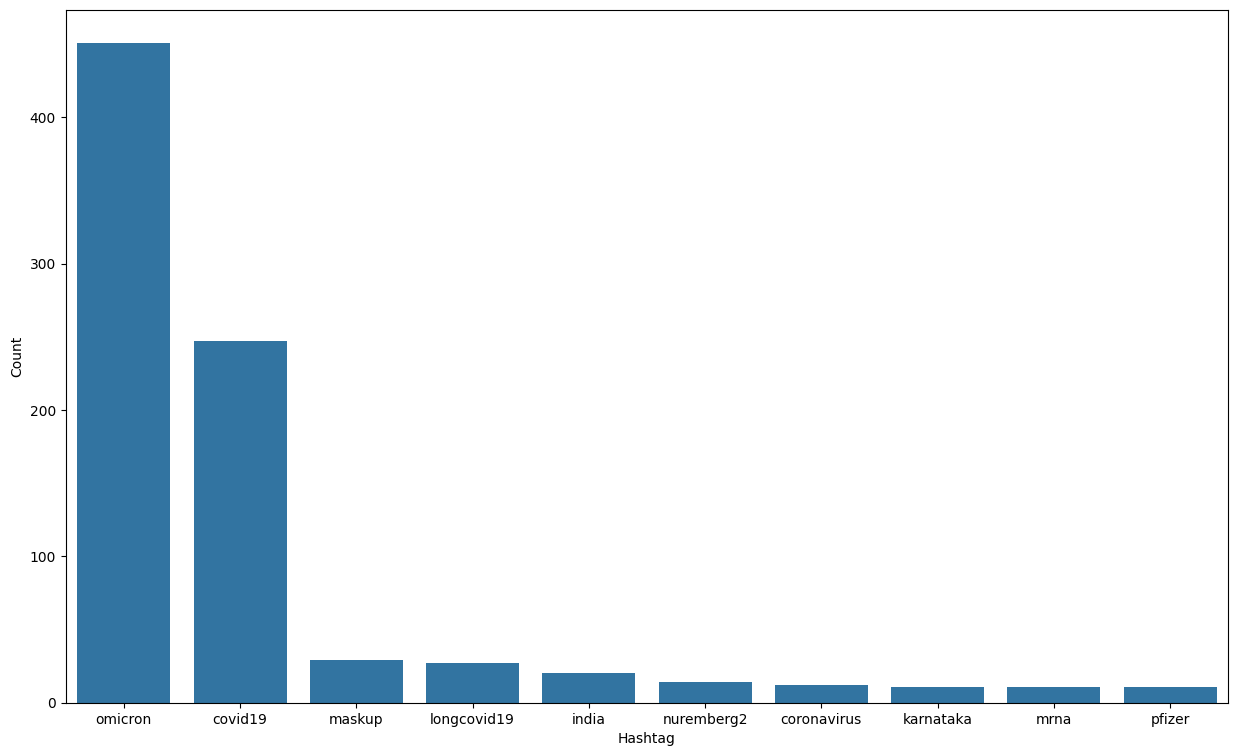

In [44]:
p = p.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=p,x='Hashtag',y='Count')
plt.show()

In [45]:
freq = nltk.FreqDist(ht_negative_lower_replace)
n = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count':list(freq.values())})
n.head()

,Hashtag,Count
0,omicron,114
1,longcovid19,12
2,sarscov2,5
3,physicianburnout,1
4,covid19,79


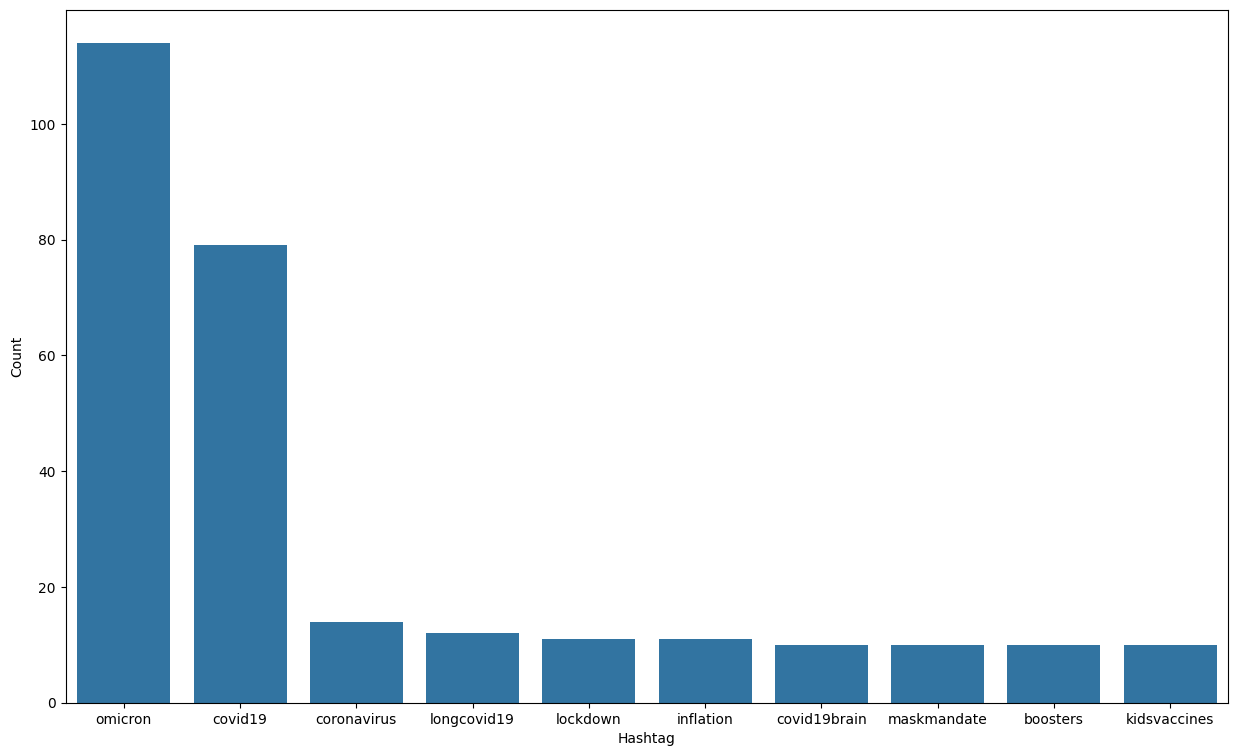

In [46]:
n = n.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=n,x='Hashtag',y='Count')
plt.show()

In [47]:
freq = nltk.FreqDist(ht_neutral_lower_replace)
nu = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count':list(freq.values())})
nu.head()

,Hashtag,Count
0,covid19,45
1,omicron,108
2,wastewater,1
3,analytics,1
4,ottawa,1


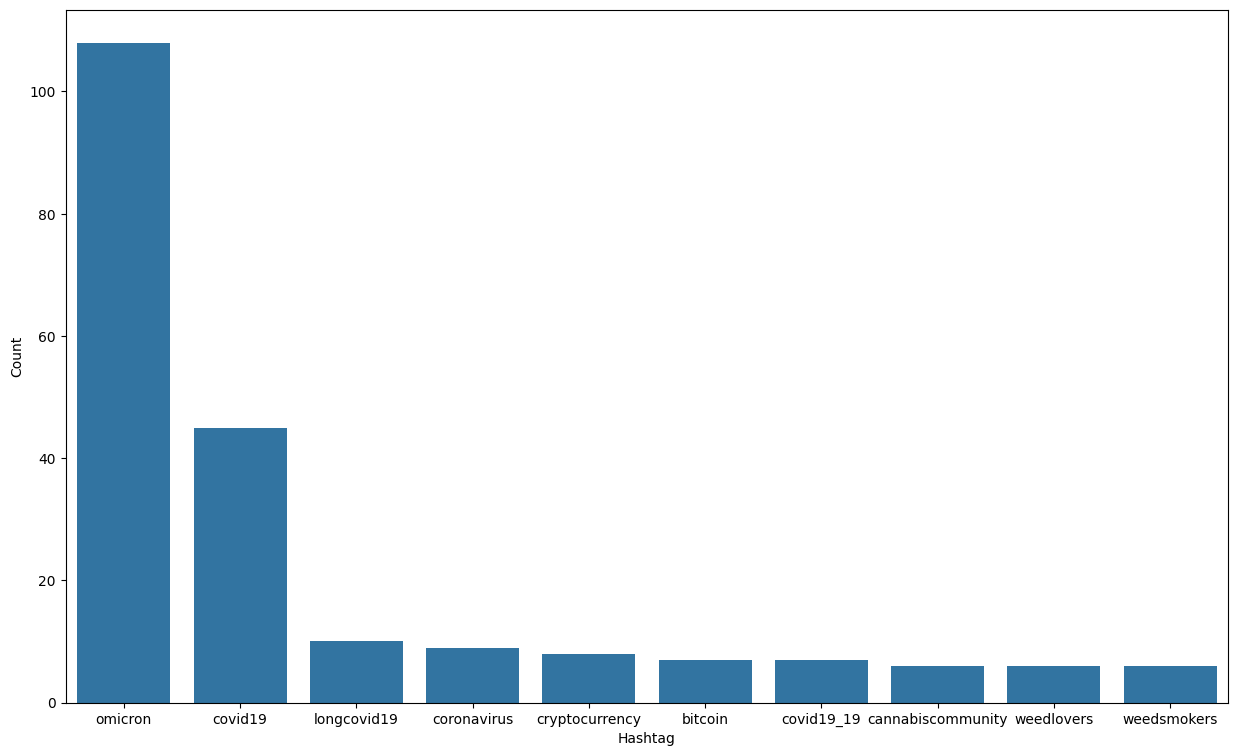

In [48]:
nu = nu.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=nu,x='Hashtag',y='Count')
plt.show()

LENGTH OF TWEETS

C:\Users\Sehjal\AppData\Local\Temp\ipykernel_17356\4137934003.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['length'],color='b',shade=True)


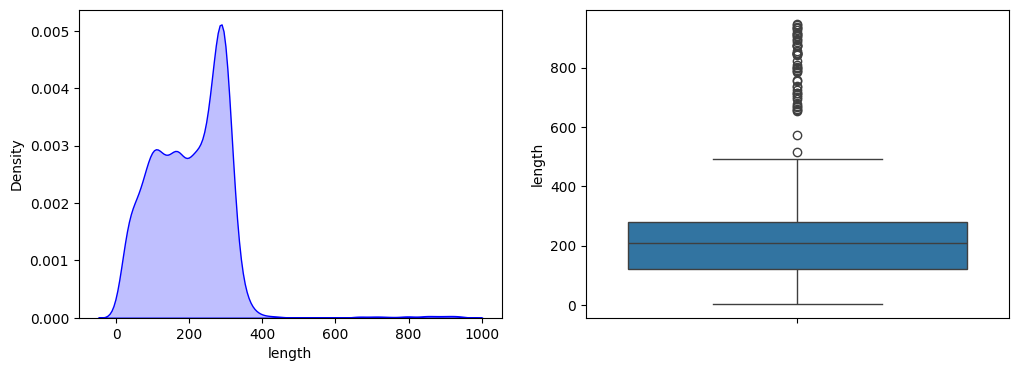

In [52]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df['length'],color='b',shade=True)
plt.subplot(1,2,2)
sns.boxplot(df['length'])
plt.show()

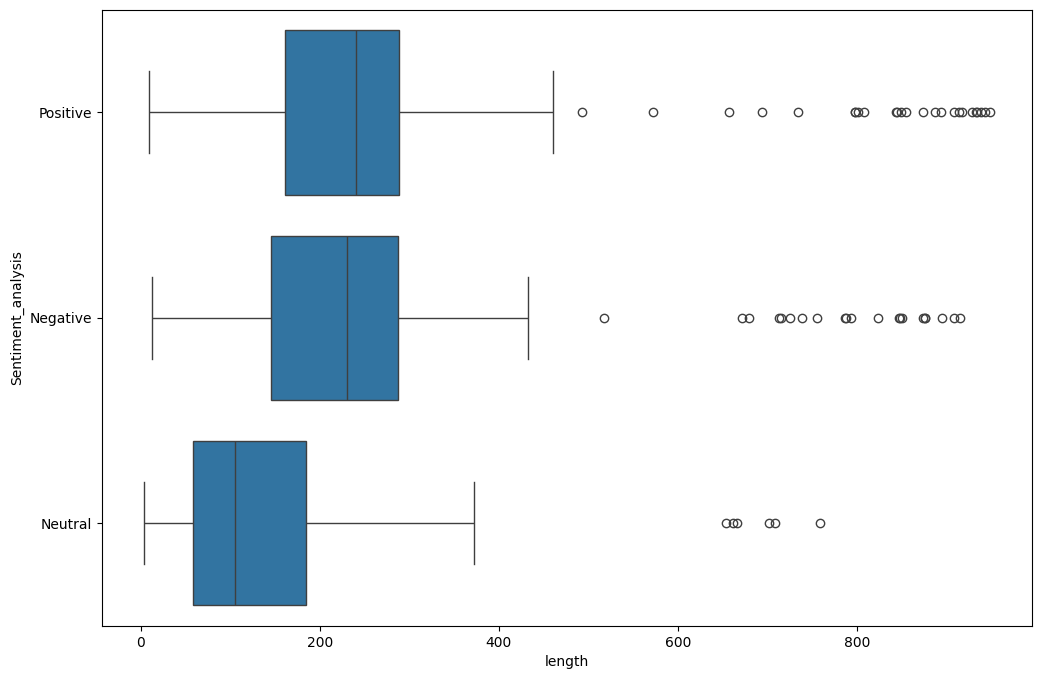

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='length', y='Sentiment_analysis')
plt.show()

In [54]:
statt,p=stats.ttest_ind(df['length'][df['Sentiment_analysis'] == 'Positive'],
                    df['length'][df['Sentiment_analysis'] == 'Negative'])
    
if p<.05:
    result="Mean value of for both sentiment is different"  
else:
    result="Mean value of for both sentiment is same"  
print('--> P-value is',p,"\n-->",result,"\n")

--> P-value is 0.058938353348275616 
--> Mean value of for both sentiment is same 



In [56]:
from collections import Counter

df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='pink')

,Common_words,count
0,the,8151
1,Omicron,4687
2,of,4146
3,to,3726
4,and,3550
5,in,3276
6,a,2980
7,I,2484
8,is,2314
9,that,2185


In [57]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

REMOVING STOPWORDS

In [59]:
nltk.download('stopwords')
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
df['temp_list'] = df['temp_list'].apply(lambda x:remove_stopword(x))
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sehjal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,tweets,likes,time,retweet_count,length,Sentiment_analysis,clean_tweets,token_tweets,stem_tweets,lemmatize_tweets,temp_list
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,116,Positive,6 big questions about new Omicron targeting bo...,"[6, big, questions, about, new, Omicron, targe...",6 big question about new omicron target booste...,6 big question about new Omicron targeting boo...,"[6, big, questions, new, Omicron, targeting, b..."
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,36,Negative,I m confused,"[I, m, confused]",i m confus,I m confused,"[I, confused]"
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,108,Positive,Long COVID less likely after Omicron than afte...,"[Long, COVID, less, likely, after, Omicron, th...",long covid less like after omicron than after ...,Long COVID le likely after Omicron than after ...,"[Long, COVID, less, likely, Omicron, original,..."
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,242,Positive,The finding don t tally with the high numbers ...,"[The, finding, don, t, tally, with, the, high,...",the find don t talli with the high number we s...,The finding don t tally with the high number w...,"[The, finding, tally, high, numbers, see, bull..."
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,262,Negative,A conference abstract from the European Congre...,"[A, conference, abstract, from, the, European,...",a confer abstract from the european congress o...,A conference abstract from the European Congre...,"[A, conference, abstract, European, Congress, ..."
...,...,...,...,...,...,...,...,...,...,...,...
6993,@Cycl_Conscience @BallouxFrancois Your argumen...,1,2023-02-27 18:56:31,0,250,Negative,Conscience Your argument is flawed Masks work ...,"[Conscience, Your, argument, is, flawed, Masks...",conscienc your argument is flaw mask work we d...,Conscience Your argument is flawed Masks work ...,"[Conscience, Your, argument, flawed, Masks, wo..."
6994,"@BretWeinstein I don't think it escaped, they ...",0,2023-02-27 18:54:55,0,202,Neutral,I don t think it escaped they opened the cell ...,"[I, don, t, think, it, escaped, they, opened, ...",i don t think it escap they open the cell door...,I don t think it escaped they opened the cell ...,"[I, think, escaped, opened, cell, door, They, ..."
6995,@_50kgold Do you have to show your face? I'd b...,0,2023-02-27 18:53:55,0,107,Neutral,50kgold Do you have to show your face I d be r...,"[50kgold, Do, you, have, to, show, your, face,...",50kgold do you have to show your face i d be r...,50kgold Do you have to show your face I d be r...,"[50kgold, Do, show, face, I, running, errands,..."
6996,@noxcato @andrewtanyongyi @TAH_Sci @hsom113 @M...,1,2023-02-27 18:49:59,0,193,Negative,Sci That it all worked before Delta Omicron is...,"[Sci, That, it, all, worked, before, Delta, Om...",sci that it all work befor delta omicron is th...,Sci That it all worked before Delta Omicron is...,"[Sci, That, worked, Delta, Omicron, fallback, ..."


In [64]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,I,2484
2,omicron,1964
3,The,1122
4,variant,878
5,COVID,868
6,2,768
7,1,728
8,amp,638
9,people,611
10,vaccine,591


MOST USED WORD IS OMICRON HERE


In [65]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [66]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

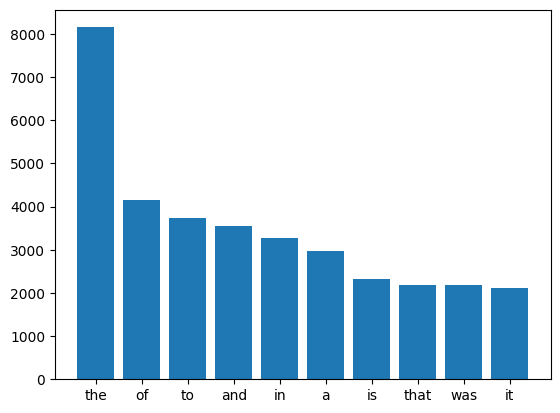

In [67]:
plot_top_stopwords_barchart(df['clean_tweets'])

SPLITTING DATA


In [68]:
X=df.lemmatize_tweets
y=df.Sentiment_analysis

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26,stratify = df.Sentiment_analysis)

In [70]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  84169


In [71]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [72]:
def model_Evaluate(model):
    
    
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Neutral','Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

BERNOULLI NAIVE

              precision    recall  f1-score   support

    Negative       1.00      0.06      0.11       344
     Neutral       0.79      0.09      0.17       322
    Positive       0.54      0.99      0.70       734

    accuracy                           0.55      1400
   macro avg       0.78      0.38      0.33      1400
weighted avg       0.71      0.55      0.43      1400



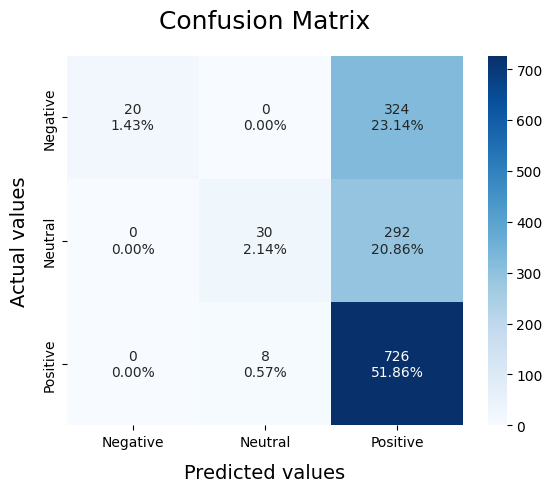

In [73]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

SVM

              precision    recall  f1-score   support

    Negative       0.75      0.50      0.60       344
     Neutral       0.82      0.54      0.65       322
    Positive       0.72      0.93      0.81       734

    accuracy                           0.74      1400
   macro avg       0.76      0.66      0.69      1400
weighted avg       0.75      0.74      0.72      1400



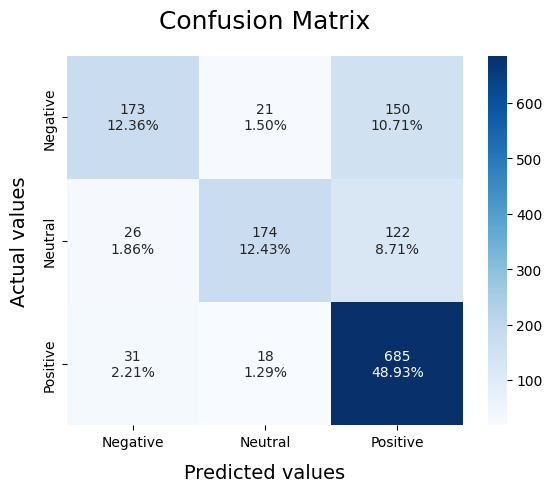

In [74]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

LINEAR REG

              precision    recall  f1-score   support

    Negative       0.81      0.39      0.53       344
     Neutral       0.81      0.46      0.59       322
    Positive       0.67      0.96      0.79       734

    accuracy                           0.70      1400
   macro avg       0.76      0.60      0.64      1400
weighted avg       0.74      0.70      0.68      1400



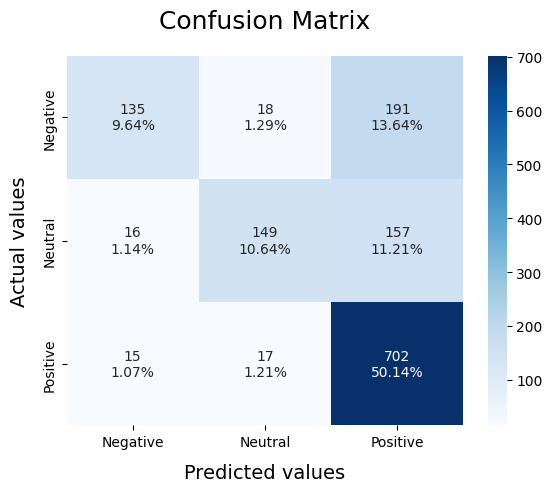

In [75]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

DECISION CLASSIFIER

              precision    recall  f1-score   support

    Negative       0.60      0.29      0.39       344
     Neutral       0.51      0.86      0.64       322
    Positive       0.76      0.71      0.73       734

    accuracy                           0.64      1400
   macro avg       0.62      0.62      0.59      1400
weighted avg       0.66      0.64      0.63      1400



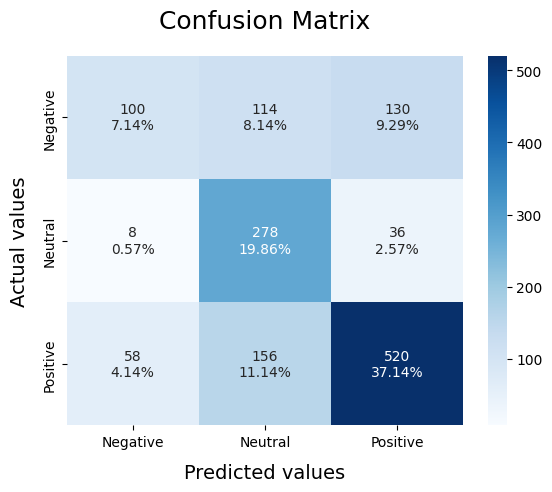

In [76]:
Dtmodel = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=0) 
Dtmodel.fit(X_train, y_train)
model_Evaluate(Dtmodel)
y_pred4 = LRmodel.predict(X_test)

RFC

              precision    recall  f1-score   support

    Negative       0.99      0.21      0.34       344
     Neutral       0.69      0.67      0.68       322
    Positive       0.67      0.92      0.78       734

    accuracy                           0.69      1400
   macro avg       0.78      0.60      0.60      1400
weighted avg       0.75      0.69      0.65      1400



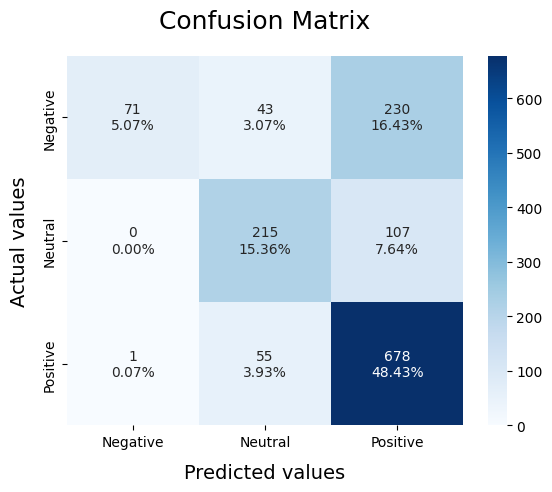

In [77]:
Rfmodel= RandomForestClassifier()
Rfmodel.fit(X_train, y_train)
model_Evaluate(Rfmodel)
y_pred5 = Rfmodel.predict(X_test)

LGB MODEL

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39505
[LightGBM] [Info] Number of data points in the train set: 5598, number of used features: 1550
[LightGBM] [Info] Start training from score -1.401776
[LightGBM] [Info] Start training from score -1.470873
[LightGBM] [Info] Start training from score -0.646043
              precision    recall  f1-score   support

    Negative       0.76      0.60      0.67       344
     Neutral       0.71      0.89      0.79       322
    Positive       0.85      0.84      0.85       734

    accuracy                           0.79      1400
   macro avg       0.77      0.78      0.77      1400
weighted avg       0.80      0.79      0.79      1400



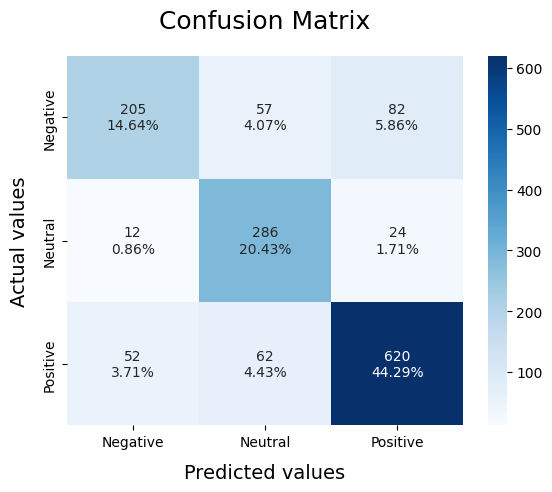

In [78]:
Lgbmmodel = lgb.LGBMClassifier()
Lgbmmodel.fit(X_train, y_train)
model_Evaluate(Lgbmmodel)
y_pred6 = Lgbmmodel.predict(X_test)

RESULTS

Light GBM emerged as the top-performing model among those evaluated, achieving an accuracy of 0.84. The dataset is skewed towards positive tweets, with a significantly lower proportion of negative examples. The model demonstrated superior performance on the positive class compared to neutral and negative sentiments.